<a href="https://colab.research.google.com/github/KrzysztofTyszecki/data-science-bootcamp/blob/main/SciPy-podstawy_statystyki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dane dyskretne - posiadające ustalone wartości np: Oceny studentow
mean() - śr. arytmetyczna
median() - mediana
Moda (wartość modalna) to najczęściej występująca wartość w ciągu.
---



In [1]:
import numpy as np

X = np.array([3, 4.5, 5, 4.5, 3])
print(X)
X.mean()

[3.  4.5 5.  4.5 3. ]


np.float64(4.0)


Dane ciągłe - posiadające różne dowolne wartości np: Wzrost studentów


In [2]:
X = np.array([185.0, 179.5, 168.0, 192.0, 185.5])
print(X)

[185.  179.5 168.  192.  185.5]


Miary rozrzutu


Średni błąd - śr. odległość od średniej. Im mniejszy tym ciąg jest mniej rozrzucony

In [3]:
X = [3.5, 4.0, 4.0]
Y = [2.0, 4.0, 5.0]

X_mean = np.mean(X)
Y_mean = np.mean(Y)

print("X_mean:", X_mean)
print("Y_mean:", Y_mean)

X_mean: 3.8333333333333335
Y_mean: 3.6666666666666665


In [4]:
b_X = 1 / len(X) * (abs(X - X_mean).sum())
b_Y = 1 / len(Y) * (abs(Y - Y_mean).sum())

print("Średni błąd X", b_X)
print("Średni błąd Y", b_Y)

Średni błąd X 0.22222222222222215
Średni błąd Y 1.1111111111111112


Warjancja, odchylenie standardowe (pierwiastek z wariancji). Im większe odchylenie od średniej tym mniejszy wpływ.

In [5]:
#ze wzoru:
var_X = 1 / len(X) * ((X - X_mean)**2).sum()
var_Y = 1 / len(Y) * ((Y - Y_mean)**2).sum()

print(f'Wariancja zmiennej X: {var_X:.4f}')
print(f'Wariancja zmiennej Y: {var_Y:.4f}\n')

std_X = np.sqrt(var_X)
std_Y = np.sqrt(var_Y)

print(f'Odchylenie standardowe zmiennej X: {std_X:.4f}')
print(f'Odchylenie standardowe zmiennej Y: {std_Y:.4f}')

Wariancja zmiennej X: 0.0556
Wariancja zmiennej Y: 1.5556

Odchylenie standardowe zmiennej X: 0.2357
Odchylenie standardowe zmiennej Y: 1.2472


In [6]:
# używając numpy
print(np.std(X))
print(np.std(Y))

0.23570226039551584
1.247219128924647


Dystry**buanta empiryczna**- funkcja schodkowa, która szacuje dystrybuantę prawdziwego rozkładu zmiennej losowej na podstawie danych z próbki.
- Służy do oszacowania i wizualizacji rozkładu cechy, gdy prawdziwy rozkład jest nieznany.
- Można ją wykorzystać do porównywania rozkładów z różnych grup, rysując ich dystrybuanty na jednym wykresie

**Przestrzeń probabilistyczna**
Przestrzeń zdarzeń elementarnych Omega: Zbiór wszystkich możliwych, wzajemnie wykluczających się wyników danego eksperymentu.
- Przykład: Przy rzucie kostką, Omega to {1, 2, 3, 4, 5, 6}.

σ-ciało zdarzeń: Rodzina wszystkich podzbiorów zbioru Omega, które odpowiadają zdarzeniom, których prawdopodobieństwo możemy określić.
- Przykład: W rzucie kostką,  zawiera m.in. zdarzenie "wypadła parzysta liczba" ({2, 4, 6}) oraz zdarzenie "wypadła liczba większa od 4" ({5, 6}).

Miara prawdopodobieństwa P: Funkcja przypisująca zdarzeniu z liczbę z przedziału [0] (czyli prawdopodobieństwo), która spełnia określone aksjomaty.
- Przykład: W rzucie symetryczną kostką, prawdopodobieństwo każdego pojedynczego wyniku jest takie samo i wynosi 1/6. Prawdopodobieństwo wypadnięcia parzystej liczby to suma prawdopodobieństw wyników {2, 4, 6}, czyli 1/6+1/6+1/6 = 3/6 = 1/2

**Przestrzeń klasyczna** odnosi się do zbioru wszystkich możliwych wyników w danym doświadczeniu losowym, czyli przestrzeni zdarzeń elementarnych. Jest to koncepcja kluczowa w rachunku prawdopodobieństwa, gdzie oblicza się prawdopodobieństwo zdarzenia jako stosunek liczby sprzyjających mu wyników do liczby wszystkich możliwych wyników, czyli elementów przestrzeni klasycznej.
- Definicja: Przestrzeń klasyczna Omega, inaczej zwana przestrzenią zdarzeń elementarnych, to zbiór wszystkich pojedynczych, niemożliwych do dalszego podziału wyników danego doświadczenia losowego.
- Przykład: W rzucie symetryczną kostką do gry, przestrzenią klasyczną jest zbiór \(\{1,2,3,4,5,6\}\). Liczba wszystkich możliwych wyników, czyli moc przestrzeni klasycznej, wynosi \(6\).
- Zastosowanie: Gdy oblicza się prawdopodobieństwo, dzieli się liczbę wyników sprzyjających danemu zdarzeniu przez liczbę wszystkich wyników w przestrzeni klasycznej.

In [7]:
omega = {1, 2, 3, 4, 5, 6}
A = {item for item in omega if item % 2 == 0}

P_A = len(A) / len(omega)
print(f'Zbiór A: {A}')
print(f'Prawdopodobieństwo zdarzenia A: {P_A}')

Zbiór A: {2, 4, 6}
Prawdopodobieństwo zdarzenia A: 0.5


In [8]:
omega = {1, 2, 3, 4, 5, 6}
B = {item for item in omega if item > 4}

P_B = len(B) / len(omega)
print(f'Zbiór B: {B}')
print(f'Prawdopodobieństwo zdarzenia B: {P_B:.4f}')

Zbiór B: {5, 6}
Prawdopodobieństwo zdarzenia B: 0.3333


In [9]:
#**NIEZALEZNOSC ZDARZEŃ**
intersection_AB = set.intersection(A, B)
P_intersection_AB = len(intersection_AB) / len(omega)

PA_PB = P_A * P_B

print(f'Przecięcie zbiorów A i B: {intersection_AB}\n')
print(f'Iloczyn prawdopodobieństw zdarzeń A i B: {PA_PB:.4f}')
print(f'Prawdopodobieństwo iloczynu zdarzeń A i B: {P_intersection_AB:.4f}\n')

check = 'Zdarzenia niezależne' if PA_PB == P_intersection_AB else 'Zdarzenia zależne'
print(check)

Przecięcie zbiorów A i B: {6}

Iloczyn prawdopodobieństw zdarzeń A i B: 0.1667
Prawdopodobieństwo iloczynu zdarzeń A i B: 0.1667

Zdarzenia niezależne


In [10]:
#Rozważmy zdarzenie  C - wyrzucenie liczby oczek większą niż 1
C = {item for item in omega if item > 1}

P_C = len(C) / len(omega)
print(f'Zbiór C: {C}')
print(f'Prawdopodobieństwo zdarzenia C: {P_C:.4f}')

intersection_AC = set.intersection(A, C)
P_intersection_AC = len(intersection_AC) / len(omega)

PA_PC = P_A * P_C

print(f'Przecięcie zbiorów A i C: {intersection_AC}\n')
print(f'Iloczyn prawdopodobieństw zdarzeń A i C: {PA_PC:.4f}')
print(f'Prawdopodobieństwo iloczynu zdarzeń A i C: {P_intersection_AC:.4f}\n')

check = 'Zdarzenia niezależne' if PA_PC == P_intersection_AC else 'Zdarzenia zależne'
print(check)


Zbiór C: {2, 3, 4, 5, 6}
Prawdopodobieństwo zdarzenia C: 0.8333
Przecięcie zbiorów A i C: {2, 4, 6}

Iloczyn prawdopodobieństw zdarzeń A i C: 0.4167
Prawdopodobieństwo iloczynu zdarzeń A i C: 0.5000

Zdarzenia zależne


In [11]:
# Prawdopodobieństwo warunkowe
print(f'A: {A}')
print(f'B: {B}')
print(f'Przecięcie A i B: {intersection_AB}')

A: {2, 4, 6}
B: {5, 6}
Przecięcie A i B: {6}


In [12]:
PA_cond_B = P_intersection_AB / P_B

print(f'Prawdopodobieństwo wylosowania liczby parzystej pod warunkiem, że wylosowaliśmy liczbę większą niż 4 wynosi: {PA_cond_B}')

Prawdopodobieństwo wylosowania liczby parzystej pod warunkiem, że wylosowaliśmy liczbę większą niż 4 wynosi: 0.5


**ZMIENNA LOSOWA**

In [13]:
EX = 0 * 0.5 + 1 * 0.3 + 2 * 0.15 + 3 * 0.05
EX

0.75

In [14]:
VAR_X = (0 - EX)**2 * 0.5 + (1 - EX)**2 * 0.3 + (2 - EX)**2 * 0.15 +(3 - EX)**2 * 0.05
VAR_X

0.7875000000000001

In [15]:
import numpy as np

STD_X = np.sqrt(VAR_X)
STD_X

np.float64(0.8874119674649424)

In [16]:
x = np.random.randn(5)
y = np.random.randn(5)

print(x, '\n')
print(y)

[-0.47011247  2.34198157 -0.87689113 -1.18816011  0.01835257] 

[ 0.10083597 -0.30106979  0.35196027 -0.64099654 -0.28524587]


In [17]:
x.mean()

np.float64(-0.03496591153900187)

Rozkład normalny

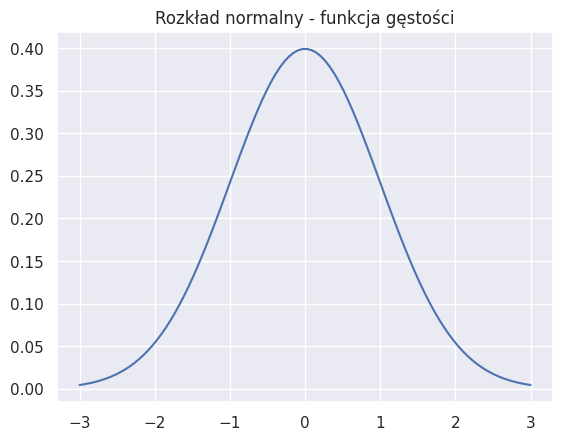

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set()

mu = 0 # średnia
sigma = 1 # odchylenie standardowe
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.title('Rozkład normalny - funkcja gęstości')
_ = plt.plot(x, norm.pdf(x, mu, sigma))